In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install scikit-plot

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving book2.cvs to book2.cvs


In [ ]:
df_train = pd.read_csv("/content/train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("/content/train.txt",delimiter=';',names=['text','label'])

In [ ]:
df = pd.concat([df_train, df_val])
df.reset_index(inplace=True, drop=True)

In [ ]:
print("Shape of the DataFrame:", df.shape)
df.sample(5)

Shape of the DataFrame: (32000, 2)


,text,label
2198,i love the most about them is the slight cat e...,joy
26413,im feeling resolved,joy
1844,i started feeling my back aching especially th...,sadness
4737,i feel welcomed cared for and ready to be pleased,joy
20971,i have trusted mike with some deeply personal ...,joy


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


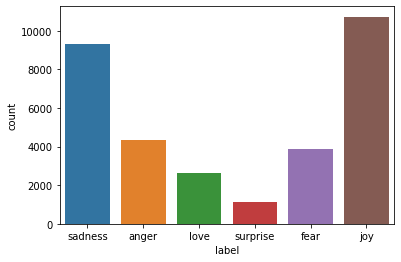

In [ ]:
sns.countplot(df.label)

In [ ]:
def custom_encoder(df):
    df.replace(to_replace="surprise", value=1, inplace=True)
    df.replace(to_replace="love", value=1, inplace=True)
    df.replace(to_replace="joy", value=1, inplace=True)
    df.replace(to_replace="fear", value=0, inplace=True)
    df.replace(to_replace="anger", value=0, inplace=True)
    df.replace(to_replace="sadness", value=0, inplace=True)

In [ ]:
custom_encoder(df['label'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


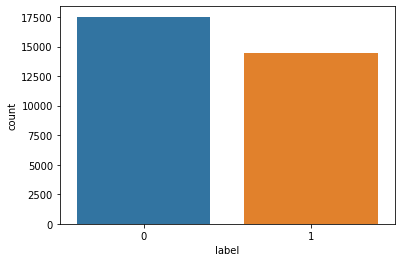

In [ ]:
sns.countplot(df.label)

In [ ]:
lm = WordNetLemmatizer()

In [ ]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]', ' ', str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(
            stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
corpus = text_transformation(df['text'])

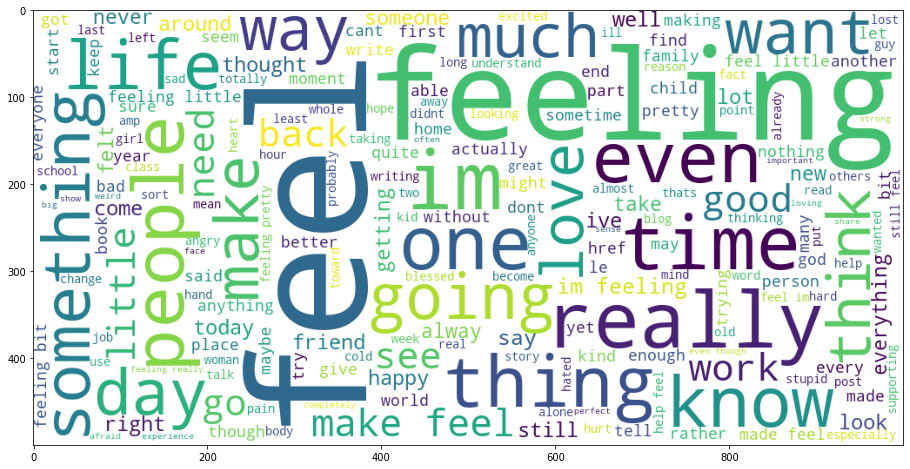

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud += " ".join(word)
wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      min_font_size=10).generate(word_cloud)
plt.imshow(wordcloud)


In [ ]:
cv = CountVectorizer(ngram_range=(1, 2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

In [ ]:
parameters = {'max_features': ('auto', 'sqrt'),
              'n_estimators': [500, 1000, 1500],
              'max_depth': [5, 10, None],
              'min_samples_split': [5, 10, 15],
              'min_samples_leaf': [1, 2, 5, 10],
              'bootstrap': [True, False]}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(
), parameters, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X, y)
grid_search.best_params_

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
for i in range(432):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

NameError: ignored

In [ ]:
from textblob import TextBlob
words = ["Machne", "Learnin"]
corrected_words = []
for i in words:
    corrected_words.append(TextBlob(i))
print("Wrong words :", words)
print("Corrected Words are :")
for i in corrected_words:
    print(i.correct(), end=" ")

Wrong words : ['Machne', 'Learnin']
Corrected Words are :
Machine Learning 

In [ ]:
!pip install textdistance

In [ ]:
import pandas as pd
import numpy as np
import textdistance
import re
from collections import Counter
words = []
with open('/content/book1.txt', 'r') as f:
    file_name_data = f.read()
    file_name_data=file_name_data.lower()
    words = re.findall('\w+',file_name_data)
# This is our vocabulary
V = set(words)
print(f"The first ten words in the text are: \n{words[0:10]}")
print(f"There are {len(V)} unique words in the vocabulary.")

The first ten words in the text are: 
['the', 'project', 'gutenberg', 'ebook', 'of', 'moby', 'dick', 'or', 'the', 'whale']
There are 17647 unique words in the vocabulary.


In [ ]:
word_freq_dict = {}  
word_freq_dict = Counter(words)
print(word_freq_dict.most_common()[0:10])

[('the', 14703), ('of', 6742), ('and', 6517), ('a', 4799), ('to', 4707), ('in', 4238), ('that', 3081), ('it', 2534), ('his', 2530), ('i', 2120)]


In [ ]:
probs = {}     
Total = sum(word_freq_dict.values())    
for k in word_freq_dict.keys():
    probs[k] = word_freq_dict[k]/Total

In [ ]:
def my_autocorrect(input_word):
    input_word = input_word.lower()
    if input_word in V:
            return('Your word seems to be correct')
    else:
        similarities = [1-(textdistance.Jaccard(qval=2).distance(v,input_word)) for v in word_freq_dict.keys()]
        df = pd.DataFrame.from_dict(probs, orient='index').reset_index()
        df = df.rename(columns={'index':'Word', 0:'Prob'})
        df['Similarity'] = similarities
        output = df.sort_values(['Similarity', 'Prob'], ascending=False).head()
        return(output)

In [ ]:
my_autocorrect('neverteless')

,Word,Prob,Similarity
2571,nevertheless,0.000225,0.750000
13657,boneless,0.000013,0.416667
12684,elevates,0.000004,0.416667
1105,never,0.000925,0.400000
7136,level,0.000108,0.400000


In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import files
# uploaded = files.upload()
df = pd.read_csv("/content/book2.cvs")
df.head()

,article_id,article_text,source
0,1,Maria Sharapova has basically no friends as te...,https://www.tennisworldusa.org/tennis/news/Mar...
1,2,"BASEL, Switzerland (AP), Roger Federer advance...",http://www.tennis.com/pro-game/2018/10/copil-s...
2,3,Roger Federer has revealed that organisers of ...,https://scroll.in/field/899938/tennis-roger-fe...
3,4,Kei Nishikori will try to end his long losing ...,http://www.tennis.com/pro-game/2018/10/nishiko...
4,5,"Federer, 37, first broke through on tour over ...",https://www.express.co.uk/sport/tennis/1036101...


In [ ]:
df['article_text'][1]

"BASEL, Switzerland (AP), Roger Federer advanced to the 14th Swiss Indoors final of his career by beating seventh-seeded Daniil Medvedev 6-1, 6-4 on Saturday. Seeking a ninth title at his hometown event, and a 99th overall, Federer will play 93th-ranked Marius Copil on Sunday. Federer dominated the 20th-ranked Medvedev and had his first match-point chance to break serve again at 5-1. He then dropped his serve to love, and let another match point slip in Medvedev's next service game by netting a backhand. He clinched on his fourth chance when Medvedev netted from the baseline. Copil upset expectations of a Federer final against Alexander Zverev in a 6-3, 6-7 (6), 6-4 win over the fifth-ranked German in the earlier semifinal. The Romanian aims for a first title after arriving at Basel without a career win over a top-10 opponent. Copil has two after also beating No. 6 Marin Cilic in the second round. Copil fired 26 aces past Zverev and never dropped serve, clinching after 2 1/2 hours with

In [ ]:
from nltk.tokenize import sent_tokenize
sentences = []
for s in df['article_text']:
    sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x]

In [ ]:
uploaded = files.upload()

Saving glove.6B.100d.txt to glove.6B.100d.txt


In [ ]:
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")
clean_sentences = [s.lower() for s in clean_sentences]
stop_words = stopwords.words('english')
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

FileNotFoundError: ignored